# Repaso de formas de crear gráficos con Matplotlib y Seaborn

Existen varias maneras de construir un mismo gráfico en Python. A continuación se repasan cuatro enfoques principales, desde el más directo hasta formas más avanzadas y organizadas.

## Creación de conjunto de datos sintético

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Datos de ejemplo
np.random.seed(42)
data = pd.DataFrame({
    "x": np.linspace(0, 10, 100),
    "y1": np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.1, 100),
    "y2": np.random.rand(100),
    "cat": np.random.choice(["A", "B"], size=100)
})




## 1. Usando Matplotlib directamente (pyplot)

> Esta es la forma más simple y rápida, ideal para gráficos rápidos o exploratorios.



In [1]:
import matplotlib.pyplot as plt

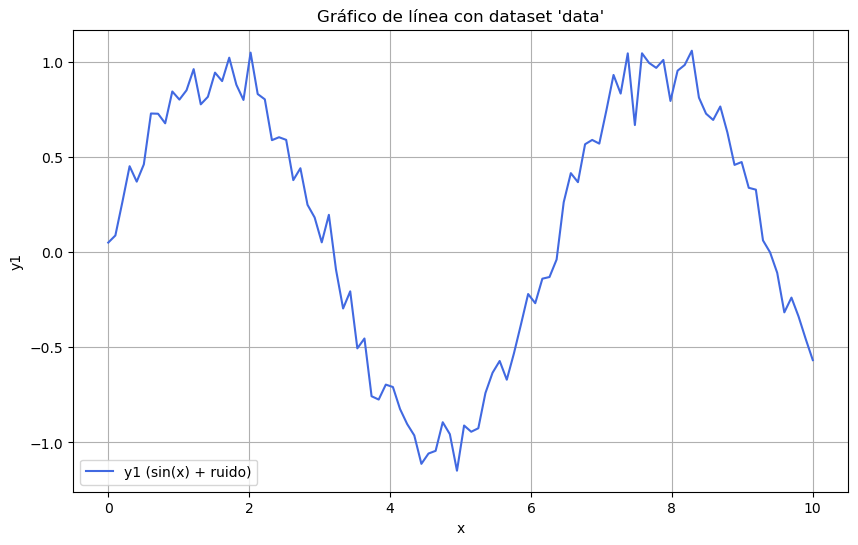

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data["x"], data["y1"], label="y1 (sin(x) + ruido)", color="royalblue")
plt.title("Gráfico de línea con dataset 'data'")
plt.xlabel("x")
plt.ylabel("y1")
plt.grid(True)
plt.legend()
plt.show()

## 2. Usando objetos Figure y Axes
> Esta forma ofrece más control y personalización, especialmente útil para gráficos más complejos.

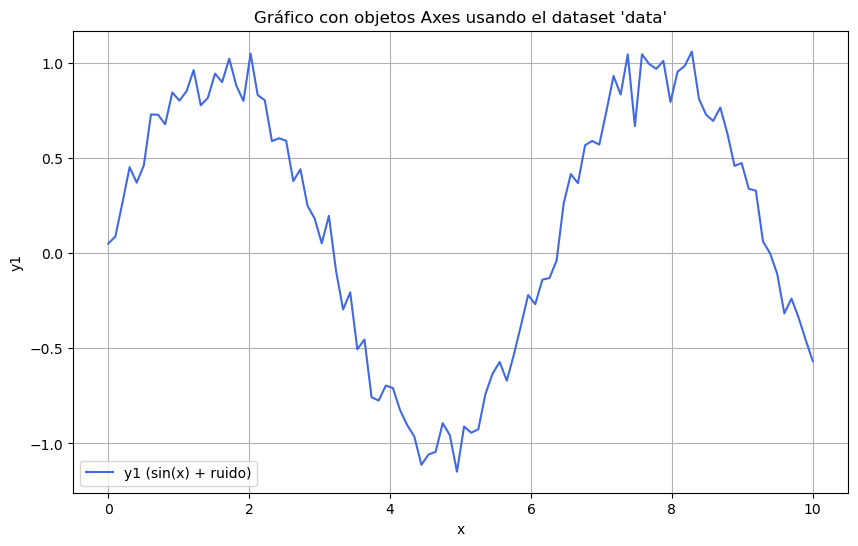

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()

ax.plot(data["x"], data["y1"], label="y1 (sin(x) + ruido)", color="royalblue")
ax.set_title("Gráfico con objetos Axes usando el dataset 'data'")
ax.set_xlabel("x")
ax.set_ylabel("y1")
ax.grid(True)
ax.legend()

plt.show()

## 3. Combinando Seaborn con Matplotlib

> Seaborn simplifica la estética y el estilo de los gráficos. Puedes seguir personalizando el objeto ax con métodos de Matplotlib.

Seaborn está construido sobre Matplotlib, por lo que hereda gran parte de su estructura y funcionalidades.
Esto significa que al crear gráficos con Seaborn:

- Puedes seguir utilizando muchas propiedades de Matplotlib (por ejemplo: `figsize`, `ax`, `set_title()`, `set_xlabel()`, `grid(True)`, etc.).
- También se pueden usar argumentos comunes de Matplotlib como `c`, `alpha`, `marker`, o `linewidth` para personalizar el color, transparencia o estilo de los elementos.
- Sin embargo, Seaborn facilita y combina la funcionalidad de estos parámetros mediante argumentos más compuestos y expresivos como:
- `hue` → para diferenciar colores según una variable categórica.
- `style` → para variar marcadores o líneas según una categoría.
- `size` → para modificar el tamaño de los puntos o líneas según una variable numérica.


In [4]:
import seaborn as sns

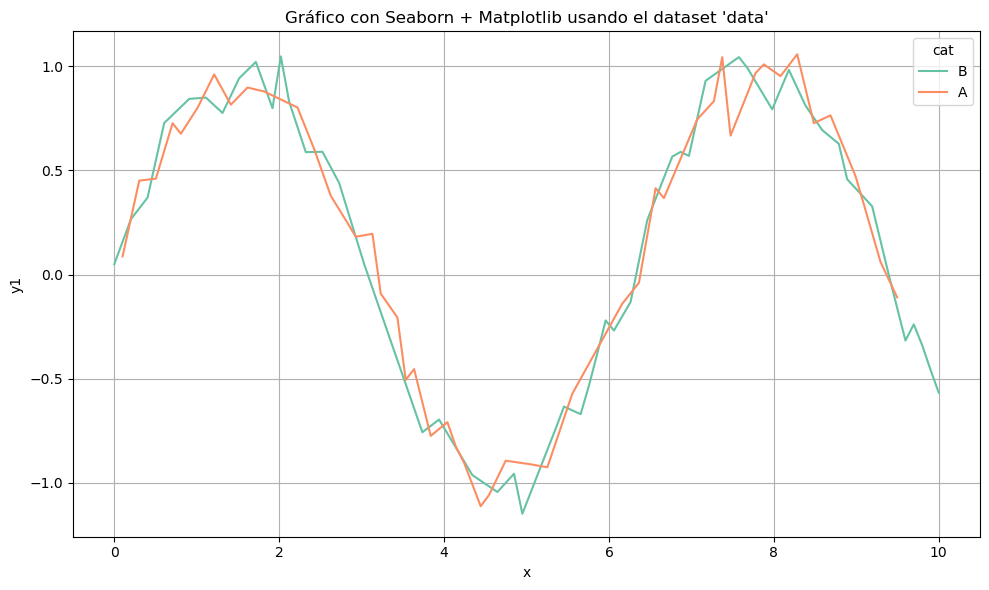

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()

sns.lineplot(data=data, x="x", y="y1", hue="cat", ax=ax, palette="Set2")

ax.set_title("Gráfico con Seaborn + Matplotlib usando el dataset 'data'")
ax.set_xlabel("x")
ax.set_ylabel("y1")
ax.grid(True)

plt.tight_layout()
plt.show()

## 4. Usando subgráficos con matplotlib (subplots):

> Ideal para gráficos múltiples en una misma figura, como dashboards o comparaciones.


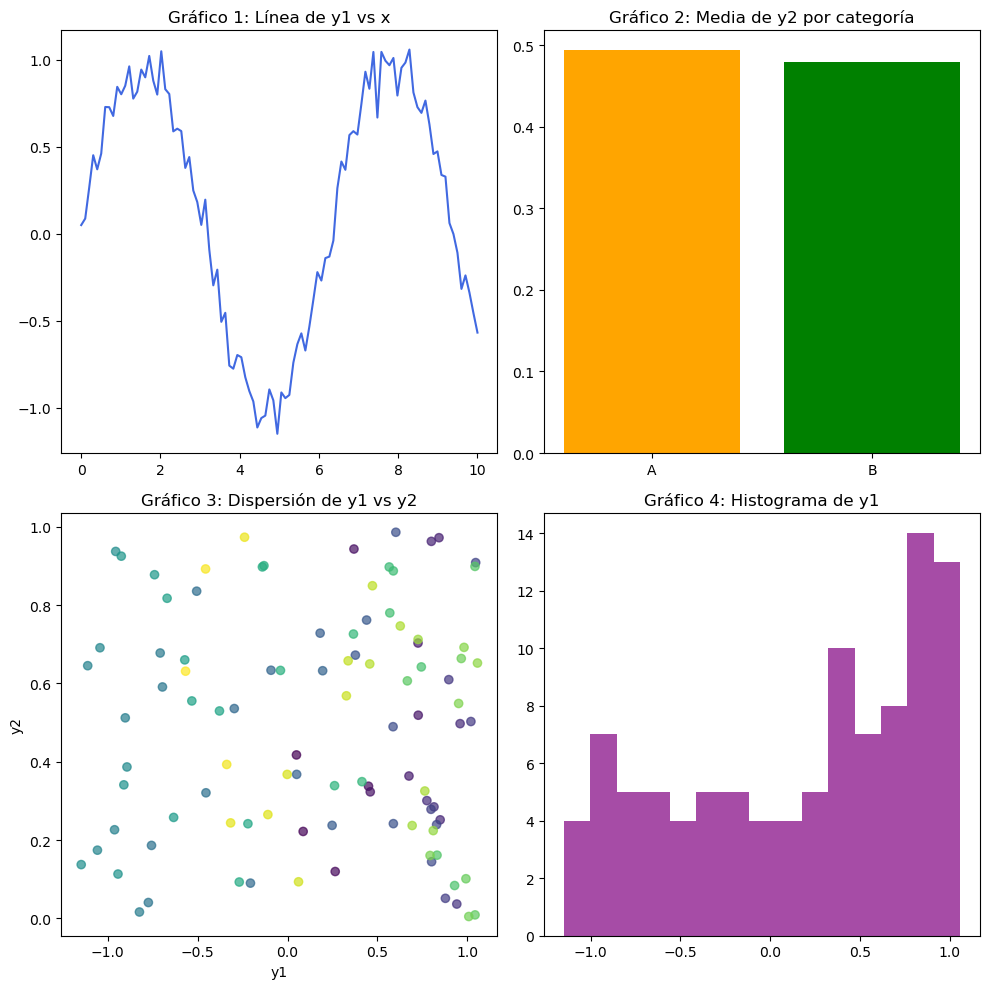

In [16]:
# --- Subplots 2x2 ---
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Gráfico 1: Línea
axes[0, 0].plot(data["x"], data["y1"], color="royalblue")
axes[0, 0].set_title("Gráfico 1: Línea de y1 vs x")

# Gráfico 2: Barras (media de y2 por categoría)
mean_y2 = data.groupby("cat")["y2"].mean()
axes[0, 1].bar(mean_y2.index, mean_y2.values, color=["orange", "green"])
axes[0, 1].set_title("Gráfico 2: Media de y2 por categoría")

# Gráfico 3: Dispersión (scatter)
axes[1, 0].scatter(data["y1"], data["y2"], alpha=0.7, c=data["x"], cmap="viridis")
axes[1, 0].set_title("Gráfico 3: Dispersión de y1 vs y2")
axes[1, 0].set_xlabel("y1")
axes[1, 0].set_ylabel("y2")

# Gráfico 4: Histograma de y1
axes[1, 1].hist(data["y1"], bins=15, color="purple", alpha=0.7)
axes[1, 1].set_title("Gráfico 4: Histograma de y1")

plt.tight_layout()
plt.show()

## 5. Subgráficos con Seaborn (subplots + Seaborn)

> Esta forma combina la organización de subgráficos de Matplotlib con el estilo y funciones sencillas de Seaborn.


/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_12799/1537796412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cat", y="y2", data=data, palette="Set3", ax=axes[1, 1])


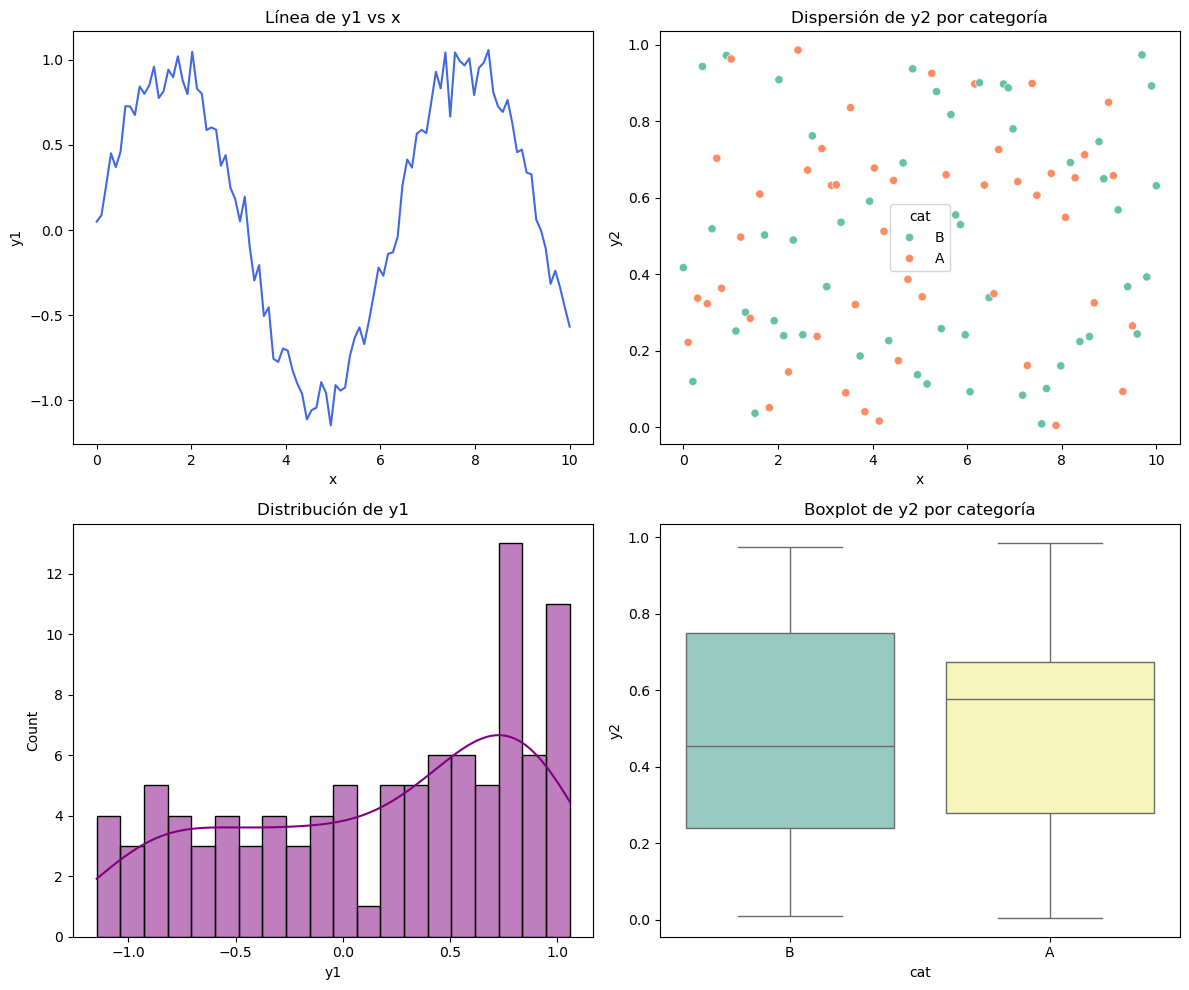

In [17]:
# --- Subplots con Seaborn ---
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# 1️⃣ Línea (tendencia de y1)
sns.lineplot(x="x", y="y1", data=data, ax=axes[0, 0], color="royalblue")
axes[0, 0].set_title("Línea de y1 vs x")

# 2️⃣ Dispersión (coloreada por categoría)
sns.scatterplot(x="x", y="y2", hue="cat", data=data, ax=axes[0, 1], palette="Set2")
axes[0, 1].set_title("Dispersión de y2 por categoría")

# 3️⃣ Histograma (distribución de y1)
sns.histplot(data["y1"], bins=20, kde=True, color="purple", ax=axes[1, 0])
axes[1, 0].set_title("Distribución de y1")

# 4️⃣ Boxplot (distribución de y2 por categoría)
sns.boxplot(x="cat", y="y2", data=data, palette="Set3", ax=axes[1, 1])
axes[1, 1].set_title("Boxplot de y2 por categoría")

plt.tight_layout()
plt.show()